## Задание 1. Разведочный анализ и подготовка данных (пингвины)

1. Загрузите набор данных о пингвинах, собранный на островах близ Антарктиды: https://www.kaggle.com/datasets/ashkhagan/palmer-penguins-datasetalternative-iris-dataset
1. Создайте ноутбук в Google Colab и подключите к нему скачанный набор данных.
1. Проведите первичное статистическое исследование количественных (минимальный, максимальный значения столбцов, медиана и т.п.) и категориальных признаков.
1. Определите наличие пропусков в данных. Предложите способы заполнения пропусков.
1. Для нескольких признаков (количественных и категориальных) подберите лучший способ визуализации распределения значений.
1. Проверьте наличие отклонений и аномалий в распределении значений признаков.
1. Примените нормализацию к какому-либо количественному признаку. Визуализируйте результат нормализации.
1. Рассмотрите категориальные признаки, выберите наиболее подходящий способ кодирования для каждого.
1. Предположите зависимости какой-либо пары признаков друг от друга. С помощью визуализации подтвердите или опровергните эту зависимость.
1. Постройте "тепловую карту" зависимости признаков.
1. В качестве итогового вывода сделайте предположение о значимости каждого признака для будущего анализа этого набора данных.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
# from google.colab import files

# files.upload()

In [ ]:
df = pd.read_csv('penguins.csv')
df = df.rename(columns={
    'bill_length_mm':'длина клюва (мм)',
    'bill_depth_mm':'толщина клюва (мм)',
    'flipper_length_mm':'длина ласт (мм)',
    'body_mass_g':'вес (г)',
    'species':'вид',
    'island':'остров',
    'species':'вид',
    'sex':'пол',
})
df.head()

,вид,остров,длина клюва (мм),толщина клюва (мм),длина ласт (мм),вес (г),пол
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


Общая статистика данных:


In [ ]:
df.describe()

,длина клюва (мм),толщина клюва (мм),длина ласт (мм),вес (г)
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Выберем нечисловые данные:


In [ ]:
df.describe(include=['O'])

,вид,остров,пол
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


- **count** -- кол-во непустых значений
- **unique** -- кол-во уникальных значений
- **top** - самая частая запись
- **freq** - кол-во появлений самой частой записи


Метод describe приводит общую статистику по конкретным полям таблицы. Но для полного представления о данных нужно знать типы полей, количество непустых записей и т.п.


Получим и эту информацию:


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   вид                 344 non-null    object 
 1   остров              344 non-null    object 
 2   длина клюва (мм)    342 non-null    float64
 3   толщина клюва (мм)  342 non-null    float64
 4   длина ласт (мм)     342 non-null    float64
 5   вес (г)             342 non-null    float64
 6   пол                 333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Заполним данные пола вручную (конечно это можно сделать даже линейной регрессией, но мы данные только анализируем):


In [ ]:
df.at[8,'пол'] = 'female'
df.at[9,'пол'] = 'male'
df.at[10,'пол'] = 'female'
df.at[11,'пол'] = 'female'
df.at[47,'пол'] = 'female'
df.at[178,'пол'] = 'male'
df.at[218,'пол'] = 'male'
df.at[256,'пол'] = 'male'
df.at[268,'пол'] = 'male'

Смотрим на строки, которые имеют NaN:


In [ ]:
df[df.isnull().any(axis=1)]

,вид,остров,длина клюва (мм),толщина клюва (мм),длина ласт (мм),вес (г),пол
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Для числовых признаков можно использовать усечённое среднее или медиану.

Существует 3 вида пропусков: полностью случайные, случайные и неслучайные. Восстановить автоматически возможно (по крайней мере теоретически) только пропуски первого типа.

Попробуем заменить пропуски в поле 'вес'. Сначала посмотрим подробнее на распределние этого поля:


In [ ]:
df['вес (г)'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: вес (г), dtype: float64

Заменим пропуски на медианное значение:


In [ ]:
df['вес (г)'] = df['вес (г)'].fillna(df['вес (г)'].median())
df['вес (г)'].describe()

count     344.000000
mean     4200.872093
std       799.696532
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: вес (г), dtype: float64

Значения распределения сдвинулись незначительно, следовательно, выбор замены на медианное значение был верным.


In [ ]:
df.isnull().sum()

вид                   0
остров                0
длина клюва (мм)      2
толщина клюва (мм)    2
длина ласт (мм)       2
вес (г)               0
пол                   2
dtype: int64

Произведём аналогичную операцию со всеми числовыми признаками:


In [ ]:
numeric_col = df.select_dtypes(exclude='object').columns.to_list()
df[numeric_col].describe()

,длина клюва (мм),толщина клюва (мм),длина ласт (мм),вес (г)
count,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4200.872093
std,5.459584,1.974793,14.061714,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df[numeric_col] = df[numeric_col].fillna(df[numeric_col].median())
df[numeric_col].describe()

,длина клюва (мм),толщина клюва (мм),длина ласт (мм),вес (г)
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

вид                   0
остров                0
длина клюва (мм)      0
толщина клюва (мм)    0
длина ласт (мм)       0
вес (г)               0
пол                   0
dtype: int64

**Визуализация распределений и взаимосвязей**


<Axes: xlabel='Count', ylabel='длина клюва (мм)'>

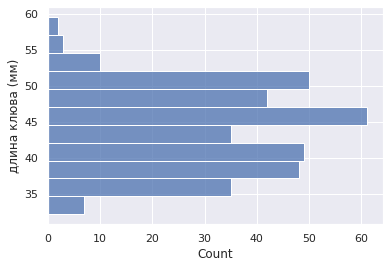

In [ ]:
sns.histplot(df, y='длина клюва (мм)')

<Axes: xlabel='Count', ylabel='толщина клюва (мм)'>

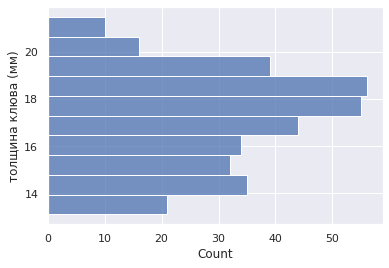

In [ ]:
sns.histplot(df, y='толщина клюва (мм)')

<Axes: xlabel='Count', ylabel='длина ласт (мм)'>

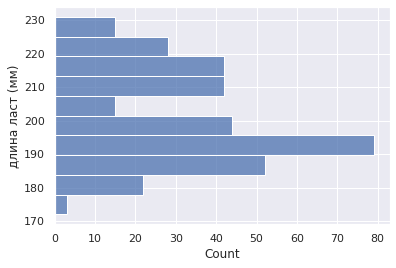

In [ ]:
sns.histplot(df, y='длина ласт (мм)')

<Axes: xlabel='Count', ylabel='вес (г)'>

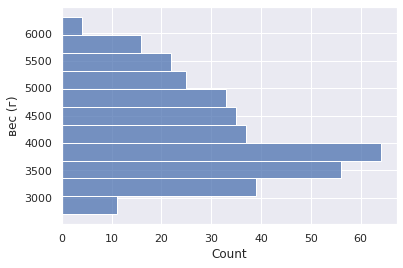

In [ ]:
sns.histplot(df, y='вес (г)')

<Axes: xlabel='пол', ylabel='count'>

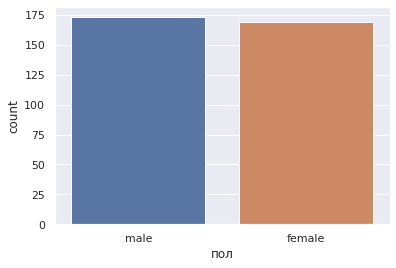

In [ ]:
sns.countplot(df, x='пол')

Можем сделать вывод, что самок немного меньше.


<Axes: xlabel='остров', ylabel='count'>

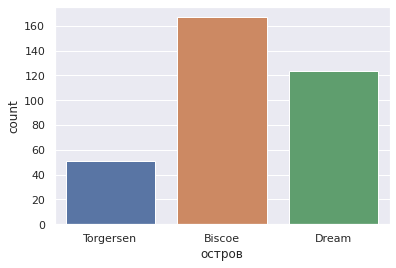

In [ ]:
sns.countplot(df, x='остров')

Большая часть пигнвинов была с острова Biscoe, как мы и видели в начале работы. Самым наименьшия является остров обитания Torgersen.


<Axes: xlabel='остров', ylabel='count'>

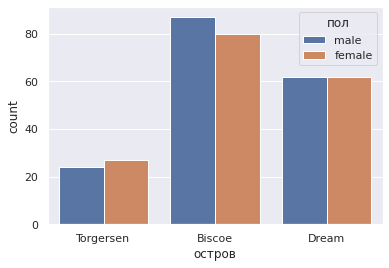

In [ ]:
sns.countplot(df, x='остров', hue='пол')

Из этой диаграммы можем увидеть, что на всех островах почти равное количество самок и самцов.


<Axes: xlabel='остров', ylabel='count'>

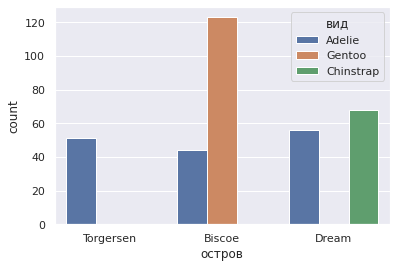

In [ ]:
sns.countplot(data=df, x='остров', hue='вид')

Смотря на эту диаграмму, можем понять, что на острове Torgersen обитают только особи вида Adelie, но они так же есть и на других островах, а особи вида Chintrap обитают только на острове Dream, особи Gentoo обитают только на острове Biscoe.


<Axes: xlabel='остров', ylabel='длина клюва (мм)'>

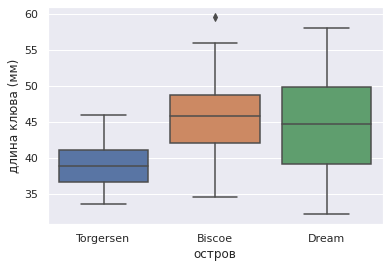

In [ ]:
sns.boxplot(data=df, y='длина клюва (мм)', x='остров')

Выбросы:


In [ ]:
df[((df['остров'] == 'Biscoe')& (df['длина клюва (мм)'] >57.5))]

,вид,остров,длина клюва (мм),толщина клюва (мм),длина ласт (мм),вес (г),пол
185,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,male


<Axes: xlabel='вид', ylabel='длина клюва (мм)'>

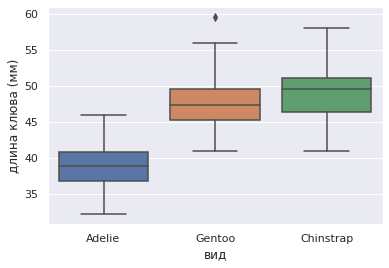

In [ ]:
sns.boxplot(data=df, y='длина клюва (мм)', x='вид')

Как можно убедиться -- длина клюва зависит от острова, а не от вида.


<Axes: xlabel='вес (г)', ylabel='длина клюва (мм)'>

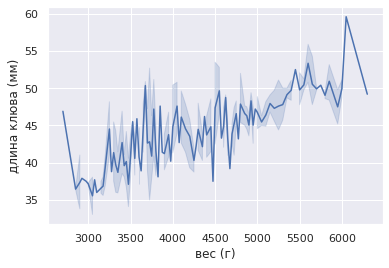

In [ ]:
sns.lineplot(data=df, x='вес (г)', y='длина клюва (мм)')

Можно сказать, что у более тяжёлых пингвинов длина клюва больше. Зависимость почти линеная.


<Axes: xlabel='вес (г)', ylabel='count'>

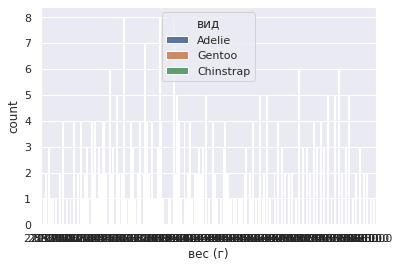

In [ ]:
sns.countplot(data=df, x='вес (г)', hue ='вид')

Диаграмма является не читаемой, поэтому попробуем сгруппировать данные по диапазонам веса.


<Axes: xlabel='группы веса', ylabel='count'>

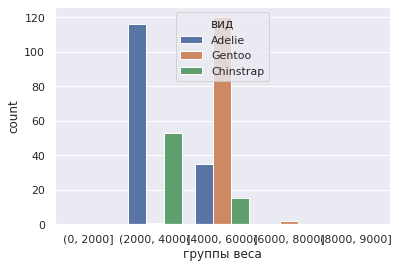

In [ ]:
df['группы веса'] = pd.cut(x=df['вес (г)'], bins=[0, 2000, 4000, 6000, 8000, 9000])
sns.countplot(data=df, x='группы веса', hue ='вид')

Средний вес у пингвинов adelie примерно 4 кг.  
Средний вес у пингвинов gentoo примерно 5 кг.


<Axes: xlabel='группы веса', ylabel='count'>

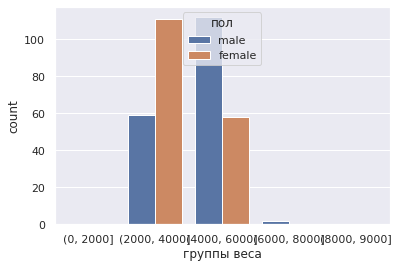

In [ ]:
sns.countplot(data=df, hue='пол', x='группы веса')

С помощью этой диаграммы мы подверждаем, что самцы тяжее самок.


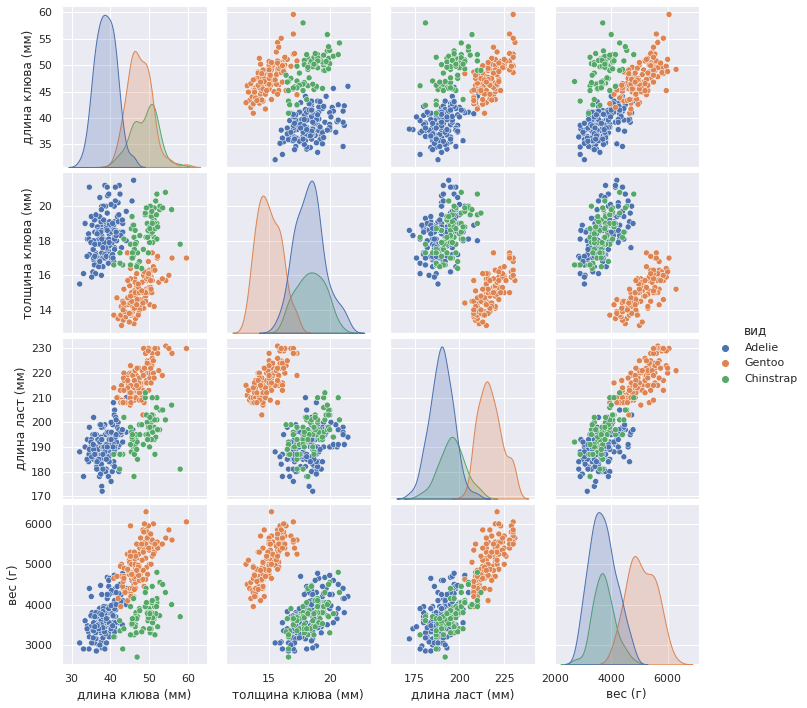

In [ ]:
sns.pairplot(df, kind="scatter", hue="вид")

**Нормализация**


7.Примените нормализацию к какому-либо количественному признаку. Визуализируйте результат нормализации.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()

df[['длина клюва (норм)', 'длина ласт (норм)']] = scaler_mm.fit_transform(df[['длина клюва (мм)', 'длина ласт (мм)']])
df.head()

,вид,остров,длина клюва (мм),толщина клюва (мм),длина ласт (мм),вес (г),пол,группы веса,длина клюва (норм),длина ласт (норм)
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,"(2000, 4000]",0.254545,0.152542
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,"(2000, 4000]",0.269091,0.237288
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,"(2000, 4000]",0.298182,0.389831
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,"(2000, 4000]",0.167273,0.355932
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,"(2000, 4000]",0.261818,0.305085


<Axes: xlabel='длина клюва (норм)', ylabel='длина ласт (норм)'>

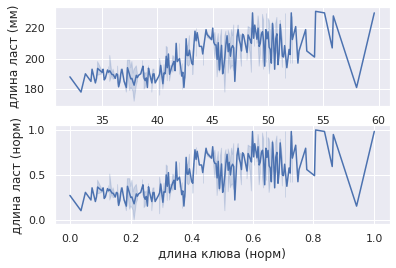

In [ ]:
_, axs = plt.subplots(nrows=2)
sns.lineplot(data=df, x='длина клюва (мм)', y='длина ласт (мм)', ax=axs[0])
sns.lineplot(data=df, x='длина клюва (норм)', y='длина ласт (норм)', ax=axs[1])

**Кодирование категориальных признаков**


# 8.Рассмотрите категориальные признаки, выберите наиболее подходящий способ кодирования для каждого.


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_sex = LabelEncoder()
df['пол'] = labelencoder_sex.fit_transform(df['пол'])
df.head()

,вид,остров,длина клюва (мм),толщина клюва (мм),длина ласт (мм),вес (г),пол,группы веса,длина клюва (норм),длина ласт (норм)
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,"(2000, 4000]",0.254545,0.152542
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,"(2000, 4000]",0.269091,0.237288
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,"(2000, 4000]",0.298182,0.389831
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,"(2000, 4000]",0.167273,0.355932
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,"(2000, 4000]",0.261818,0.305085


Закодировали пол пингвинов в числовую интерпритацию.


Закодируем категориальный признак "Остров происхождения" в числа, чтобы в дальнейшем было удобнее использовать их в сравнении


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
isl = pd.DataFrame(onehotencoder.fit_transform(df[['остров']]).toarray(), columns=['Biscoe', 'Dream', 'Torgersen'])
df = df.join(isl)
df

,вид,остров,длина клюва (мм),толщина клюва (мм),длина ласт (мм),вес (г),пол,группы веса,длина клюва (норм),длина ласт (норм),Biscoe,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,"(2000, 4000]",0.254545,0.152542,0.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,"(2000, 4000]",0.269091,0.237288,0.0,0.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,"(2000, 4000]",0.298182,0.389831,0.0,0.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,"(2000, 4000]",0.167273,0.355932,0.0,0.0,1.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,"(2000, 4000]",0.261818,0.305085,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,1,"(2000, 4000]",0.861818,0.593220,0.0,1.0,0.0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,0,"(2000, 4000]",0.414545,0.508475,0.0,1.0,0.0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,1,"(2000, 4000]",0.636364,0.355932,0.0,1.0,0.0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,1,"(4000, 6000]",0.680000,0.644068,NaN,NaN,NaN


10.Постройте "тепловую карту" зависимости признаков.


<Axes: >

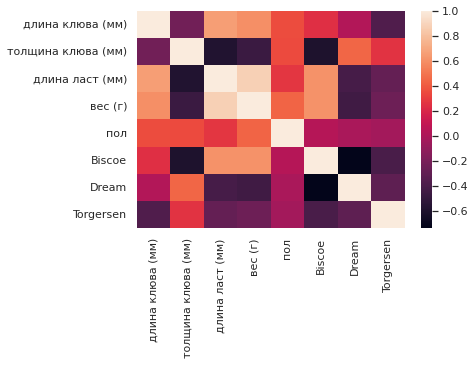

In [ ]:
sns.heatmap(df.drop(columns=['длина клюва (норм)','длина ласт (норм)',]).corr())

Как можно видеть, длина ласт обратно лин. зависима от толщины клюва, а длина ласт прямо лин. зависима от длины клюва.
